# Poker Hand Data Set 

### Relevant Information:

Each record is an example of a hand consisting of five playing
cards drawn from a standard deck of 52. Each card is described
using two attributes (suit and rank), for a total of 10 predictive
attributes. There is one Class attribute that describes the
�Poker Hand�. The order of cards is important, which is why there
are 480 possible Royal Flush hands as compared to 4 (one for each
suit � explained in more detail below).

### Statistics:

| | | | |
| - | - | - | - |
| Poker Hand       | # of hands	| Probability	| # of combinations
| Royal Flush      | 4		| 0.00000154	| 480
| Straight Flush   | 36		| 0.00001385	| 4320
| Four of a kind   | 624		| 0.0002401	| 74880
| Full house       | 3744		| 0.00144058	| 449280
| Flush            | 5108		| 0.0019654	| 612960
| Straight         | 10200		| 0.00392464	| 1224000
| Three of a kind  | 54912		| 0.02112845	| 6589440
| Two pairs        | 123552		| 0.04753902	| 14826240
| One pair         | 1098240	| 0.42256903	| 31788800
| Nothing          | 1302540	| 0.50117739	| 156304800
| | | | |
| Total            | 2598960	| 1.0		| 311875200

# Preprocessing Data

In [1]:
import numpy as np
import pandas as pd

import keras
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dense, LeakyReLU, Embedding, LSTM
from keras.models import Model
from keras.utils import plot_model

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in [0,9,13]:
    si = plt.style.available[i]
    plt.style.use(si)

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path = '../data/Poker/poker-hand-training-true.data'
df = pd.read_csv(path, names=['s1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5', 'c5', 'label'])

In [3]:
df.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
x_train = to_categorical(df[df.columns[:-1]])
y_train = to_categorical(df[df.columns[-1]])
x_train[0], y_train[0]

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [5]:
df_test = pd.read_csv('../data/Poker/poker-hand-testing.data')

In [6]:
x_test = to_categorical(df_test[df_test.columns[:-1]])
y_test = to_categorical(df_test[df_test.columns[-1]])

# MLP Model

In [7]:
shape0, shape1 = x_train.shape[1:]
shape0, shape1

(10, 14)

In [8]:
inputs = Input(shape=(shape0, shape1, ))
# a layer instance is callable on a tensor, and returns a tensor
x = Flatten()(inputs)
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dense(64)(x)
x = LeakyReLU()(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()
# plot_model(model, to_file='model.png')
# plt.figure(figsize=(10,10))
# img=mpimg.imread('model.png')
# imgplot = plt.imshow(img)
# plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 14)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 140)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total para

In [11]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=12, 
                    batch_size=64,)  # starts training

Instructions for updating:
Use tf.cast instead.
Train on 25010 samples, validate on 999999 samples
Epoch 1/12
25010/25010 [==============================] - 8s 337us/step - loss: 1.0401 - acc: 0.4859 - val_loss: 0.9854 - val_acc: 0.5006
Epoch 2/12
25010/25010 [==============================] - 8s 307us/step - loss: 0.9854 - acc: 0.4972 - val_loss: 0.9876 - val_acc: 0.5015
Epoch 3/12
25010/25010 [==============================] - 7s 290us/step - loss: 0.9800 - acc: 0.5072 - val_loss: 0.9786 - val_acc: 0.5138
Epoch 4/12
25010/25010 [==============================] - 7s 291us/step - loss: 0.9654 - acc: 0.5343 - val_loss: 0.9572 - val_acc: 0.5545
Epoch 5/12
25010/25010 [==============================] - 7s 293us/step - loss: 0.9182 - acc: 0.5929 - val_loss: 0.8991 - val_acc: 0.6049
Epoch 6/12
25010/25010 [==============================] - 8s 304us/step - loss: 0.8349 - acc: 0.6475 - val_loss: 0.8182 - val_acc: 0.6562
Epoch 7/12
25010/25010 [==============================] - 7s 289us/step -

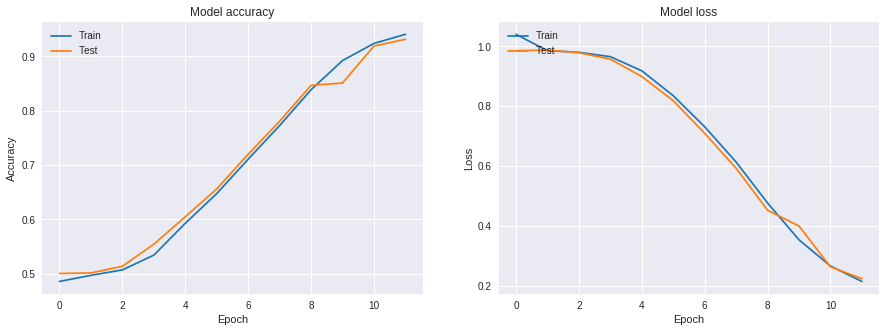

In [22]:
plt.figure(figsize=(15,5))


# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Validation

In [25]:
from sklearn.metrics import confusion_matrix

In [37]:
# y_pred = model.predict(x_test)
y_pred, y_test

(array([[7.61489500e-04, 8.70829403e-01, 1.13788597e-01, ...,
         5.69776399e-04, 6.63058236e-05, 1.16399715e-05],
        [8.98433030e-02, 8.97803664e-01, 8.51337239e-03, ...,
         7.00559394e-06, 3.51997092e-04, 1.74108245e-05],
        [3.67882662e-02, 9.34278250e-01, 2.34111175e-02, ...,
         5.11637381e-06, 1.51211731e-04, 1.19905577e-04],
        ...,
        [6.51913986e-04, 9.41128552e-01, 5.07548861e-02, ...,
         1.55832866e-04, 3.65347732e-05, 1.39949507e-05],
        [4.21191216e-04, 8.77957284e-01, 9.98764411e-02, ...,
         2.69305165e-04, 3.16952319e-05, 8.11283644e-06],
        [8.57015948e-06, 5.89778185e-01, 2.70815849e-01, ...,
         1.42593723e-04, 1.60796590e-05, 1.08164716e-06]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dt

In [36]:
matrix = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
matrix

,0,1,2,3,4,5,6,7,8,9
0,496075,5133,0,0,0,0,0,0,0,0
1,10155,412330,13,0,0,0,0,0,0,0
2,0,38203,7260,2159,0,0,0,0,0,0
3,0,769,4532,15820,0,0,0,0,0,0
4,3597,288,0,0,0,0,0,0,0,0
5,1990,6,0,0,0,0,0,0,0,0
6,0,0,48,1376,0,0,0,0,0,0
7,0,0,0,230,0,0,0,0,0,0
8,11,1,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0
